## Preambule

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

# Plotting0
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.colors import n_colors

In [2]:
countries_iso =  np.load("K:/ECEMF/T5.2/all_countries.npy", allow_pickle=True)

## Input

In [3]:
rules_b = ['GF', 'PC', 'PCC', 'AP', 'GDR', 'ECPC']

## Read data

In [4]:
xr_dataread = xr.open_dataset("K:/ECEMF/T5.2/xr_dataread.nc")
#xr_2030 = xr.open_dataset("X:/user/dekkerm/Projects/ECEMF_T5.2/Data/xr_alloc_2030.nc")

In [5]:
df_ar6_raw = pd.read_csv("X:/user/dekkerm/Data/IPCC/AR6_Scenarios_Database_World_v1.1.csv")

In [6]:
df_ar6 = df_ar6_raw[df_ar6_raw.Variable.isin(['Emissions|Kyoto Gases', 'Emissions|CO2', 'Emissions|CH4', 'Emissions|N2O', 'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile'])]
df_ar6 = df_ar6.reset_index(drop=True)

df_ar6_meta = pd.read_excel("X:/user/dekkerm/Data/IPCC/AR6_Scenarios_Database_metadata_indicators_v1.1.xlsx", sheet_name='meta_Ch3vetted_withclimate')
mods = np.array(df_ar6_meta.Model)
scens = np.array(df_ar6_meta.Scenario)
modscens_meta = np.array([mods[i]+'|'+scens[i] for i in range(len(scens))])
df_ar6_meta['ModelScenario'] = modscens_meta
df_ar6_meta = df_ar6_meta[['ModelScenario', 'Category', 'Policy_category']]

df_ar6_meta_c1 = df_ar6_meta[df_ar6_meta.Category.isin(['C1'])]
df_ar6_meta_c1 = df_ar6_meta_c1.reset_index(drop=True)
ms_c1 = np.array(df_ar6_meta_c1.ModelScenario)

df_ar6_meta_c2 = df_ar6_meta[df_ar6_meta.Category.isin(['C2'])]
df_ar6_meta_c2 = df_ar6_meta_c2.reset_index(drop=True)
ms_c2 = np.array(df_ar6_meta_c2.ModelScenario)

df_ar6_meta_c3 = df_ar6_meta[df_ar6_meta.Category.isin(['C3'])]
df_ar6_meta_c3 = df_ar6_meta_c3.reset_index(drop=True)
ms_c3 = np.array(df_ar6_meta_c3.ModelScenario)

mods = np.array(df_ar6.Model)
scens = np.array(df_ar6.Scenario)
modscens = np.array([mods[i]+'|'+scens[i] for i in range(len(scens))])
df_ar6['ModelScenario'] = modscens
df_ar6 = df_ar6.drop(['Model', 'Scenario', 'Unit', 'Region'], axis=1)

In [7]:
dummy = df_ar6.melt(id_vars=["Variable", "ModelScenario"], var_name="Time", value_name="Value")
dummy['Time'] = np.array(dummy['Time'].astype(int))
dummy = dummy.set_index(["Variable", "ModelScenario", "Time"])
xr_scen = xr.Dataset.from_dataframe(dummy)
xr_scen = xr_scen.reindex(Time = np.arange(1990, 2101))
xr_scen = xr_scen.interpolate_na(dim="Time", method="linear")

In [8]:
def ms_temp(T):
    return xr_scen.ModelScenario[np.where((xr_scen.sel(Variable = 'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile', Time=2100).Value < T+0.1) & (xr_scen.sel(Variable = 'AR6 climate diagnostics|Surface Temperature (GSAT)|MAGICCv7.5.3|50.0th Percentile', Time=2100).Value > T-0.1))[0]]

## Plots

x:\user\dekkerm\environments\MyEnv2\lib\site-packages\xarray\core\nputils.py:227: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
x:\user\dekkerm\environments\MyEnv2\lib\site-packages\xarray\core\nputils.py:227: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
x:\user\dekkerm\environments\MyEnv2\lib\site-packages\xarray\core\nputils.py:227: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
x:\user\dekkerm\environments\MyEnv2\lib\site-packages\xarray\core\nputils.py:227: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
x:\user\dekkerm\environments\MyEnv2\lib\site-packages\xarray\core\nputils.py:227: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)
x:\user\dekkerm\environments\MyEnv2\lib\site-packages\xarray

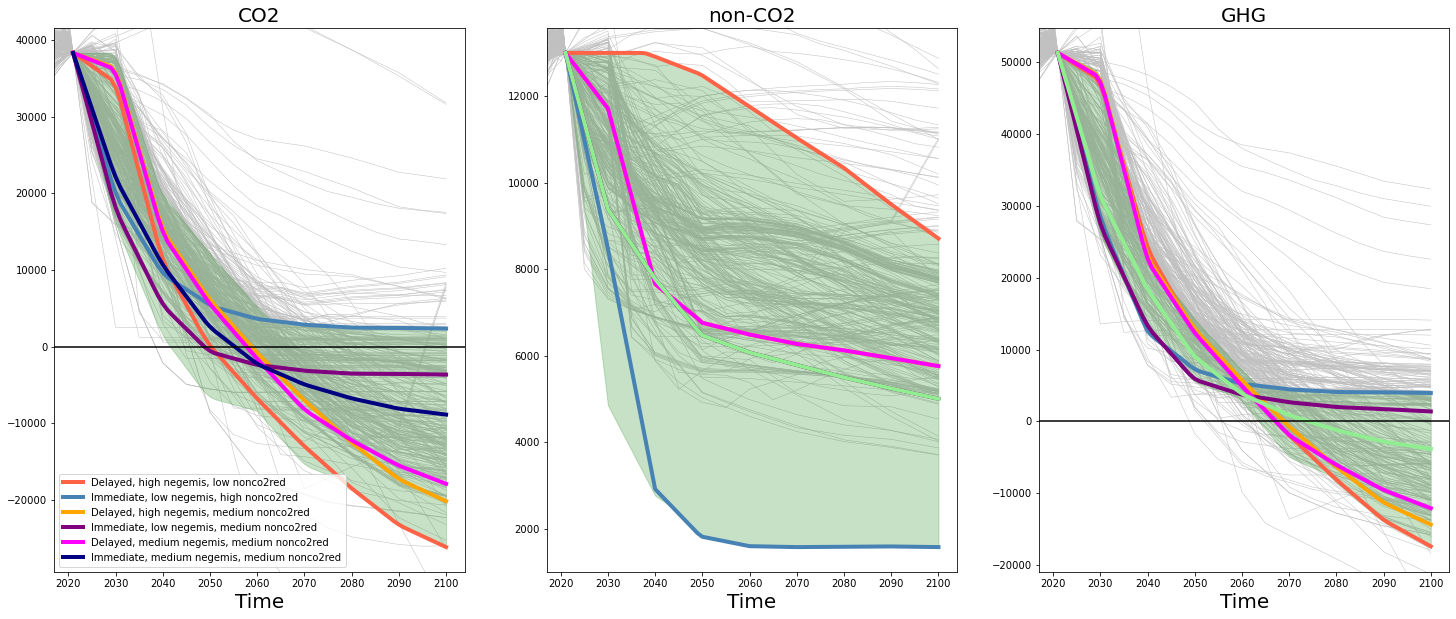

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 10), sharex=True, facecolor='w')

data = xr_dataread.sel(Temperature=1.5, Risk=0.5, Timing='Delayed', NegEmis=0.8, NonCO2red=0)
ax1.plot(xr_dataread.Time, data.CO2_globe, lw=4, label='Delayed, high negemis, low nonco2red', c='tomato')
ax2.plot(xr_dataread.Time, data.NonCO2_globe, lw=4, c='tomato')
ax3.plot(xr_dataread.Time, data.GHG_globe, lw=4, c='tomato')

data = xr_dataread.sel(Temperature=1.5, Risk=0.5, Timing='Immediate', NegEmis=0.2, NonCO2red=0.8)
ax1.plot(xr_dataread.Time, data.CO2_globe, lw=4, label='Immediate, low negemis, high nonco2red', c='steelblue')
ax2.plot(xr_dataread.Time, data.NonCO2_globe, lw=4, c='steelblue')
ax3.plot(xr_dataread.Time, data.GHG_globe, lw=4, c='steelblue')

data = xr_dataread.sel(Temperature=1.5, Risk=0.5, Timing='Delayed', NegEmis=0.8, NonCO2red=0.4)
ax1.plot(xr_dataread.Time, data.CO2_globe, lw=4, label='Delayed, high negemis, medium nonco2red', c='orange')
ax2.plot(xr_dataread.Time, data.NonCO2_globe, lw=4, c='orange')
ax3.plot(xr_dataread.Time, data.GHG_globe, lw=4, c='orange')

data = xr_dataread.sel(Temperature=1.5, Risk=0.5, Timing='Immediate', NegEmis=0.2, NonCO2red=0.4)
ax1.plot(xr_dataread.Time, data.CO2_globe, lw=4, label='Immediate, low negemis, medium nonco2red', c='purple')
ax2.plot(xr_dataread.Time, data.NonCO2_globe, lw=4, c='purple')
ax3.plot(xr_dataread.Time, data.GHG_globe, lw=4, c='purple')

data = xr_dataread.sel(Temperature=1.5, Risk=0.5, Timing='Delayed', NegEmis=0.5, NonCO2red=0.4)
ax1.plot(xr_dataread.Time, data.CO2_globe, lw=4, label='Delayed, medium negemis, medium nonco2red', c='magenta')
ax2.plot(xr_dataread.Time, data.NonCO2_globe, lw=4, c='magenta')
ax3.plot(xr_dataread.Time, data.GHG_globe, lw=4, c='magenta')

data = xr_dataread.sel(Temperature=1.5, Risk=0.5, Timing='Immediate', NegEmis=0.5, NonCO2red=0.4)
ax1.plot(xr_dataread.Time, data.CO2_globe, lw=4, label='Immediate, medium negemis, medium nonco2red', c='navy')
ax2.plot(xr_dataread.Time, data.NonCO2_globe, lw=4, c='lightgreen')
ax3.plot(xr_dataread.Time, data.GHG_globe, lw=4, c='lightgreen')

data1 = xr_dataread.sel(Temperature=1.5, Risk=0.5).max(dim=['Timing', 'NegEmis', 'NonCO2red'])
data2 = xr_dataread.sel(Temperature=1.5, Risk=0.5).min(dim=['Timing', 'NegEmis', 'NonCO2red'])
ax1.fill_between(xr_dataread.Time, data1.CO2_globe, data2.CO2_globe, where=data1.CO2_globe>=data2.CO2_globe, color='forestgreen', alpha=0.25)
ax2.fill_between(xr_dataread.Time, data1.NonCO2_globe, data2.NonCO2_globe, where=data1.NonCO2_globe>=data2.NonCO2_globe, color='forestgreen', alpha=0.25)
ax3.fill_between(xr_dataread.Time, data1.GHG_globe, data2.GHG_globe, where=data1.GHG_globe>=data2.GHG_globe, color='forestgreen', alpha=0.25)

ax1.legend()
for ax_i, ax in enumerate([ax1, ax2, ax3]):
    ax.set_xlabel("Time", fontsize=20)
    ax.set_title(["CO2", "non-CO2", "GHG"][ax_i], fontsize=20)
    ax.set_xlim(ax.get_xlim())
    ax.set_ylim(ax.get_ylim())
    ax.plot([-1e3, 1e5], [0, 0], c='k')

mslist = ms_temp(1.5)
for ms_i, ms in enumerate(mslist):
    dat =  xr_scen.sel(Variable='Emissions|CO2', ModelScenario=ms).Value
    offset = float(dat.sel(Time=2021) - xr_dataread.CO2_globe.sel(Time=2021).mean())
    dat_new = dat - offset
    ax1.plot(xr_scen.Time, dat_new, c='silver', lw=0.5, zorder=-1)

    dat =   xr_scen.sel(Variable='Emissions|CH4', ModelScenario=ms).Value*25 + xr_scen.sel(Variable='Emissions|N2O', ModelScenario=ms).Value*298/1e3
    offset = float(dat.sel(Time=2021) - xr_dataread.NonCO2_globe.sel(Time=2021).mean())
    dat_new = dat - offset
    ax2.plot(xr_scen.Time, dat_new, c='silver', lw=0.5, zorder=-1)

    dat =  xr_scen.sel(Variable='Emissions|Kyoto Gases', ModelScenario=ms).Value
    offset = float(dat.sel(Time=2021) - xr_dataread.GHG_globe.sel(Time=2021).mean())
    dat_new = dat - offset
    ax3.plot(xr_scen.Time, dat_new, c='silver', lw=0.5, zorder=-1)

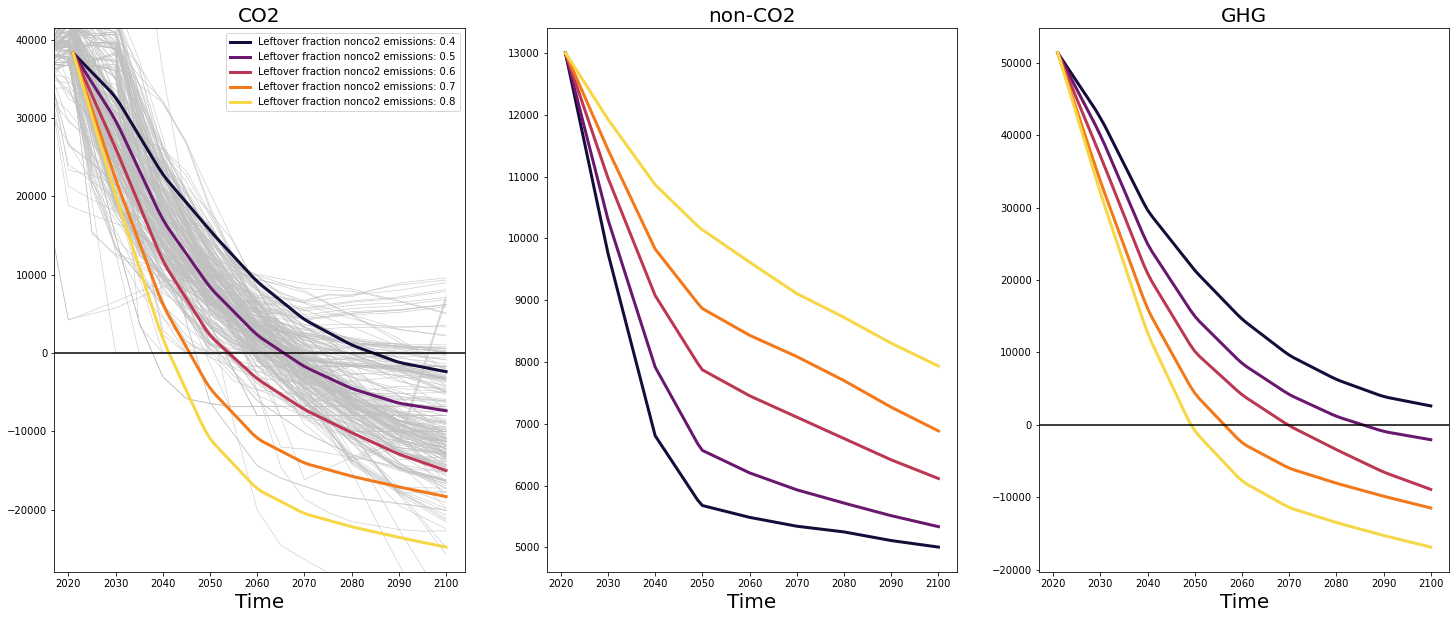

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 10), sharex=True)
for nonco2_i, nonco2 in enumerate(xr_dataread.NonCO2):
    col = plt.cm.inferno(nonco2_i/len(xr_dataread.NonCO2))
    ax1.plot(xr_dataread.Time, xr_dataread.CO2_globe.sel(Temperature=1.5, Risk=0.5, NegEmis=0.5, NonCO2=nonco2), label='Leftover fraction nonco2 emissions: '+str(float(nonco2)), lw=3, c=col)
    ax2.plot(xr_dataread.Time, xr_dataread.NonCO2_globe.sel(NonCO2=nonco2), label='Leftover fraction nonco2 emissions: '+str(float(nonco2)), lw=3, c=col)
    ax3.plot(xr_dataread.Time, xr_dataread.GHG_globe.sel(Temperature=1.5, Risk=0.5, NegEmis=0.5, NonCO2=nonco2), label='Leftover fraction nonco2 emissions: '+str(float(nonco2)), lw=3, c=col)

ax1.legend()
for ax_i, ax in enumerate([ax1, ax2, ax3]):
    ax.set_xlabel("Time", fontsize=20)
    ax.set_title(["CO2", "non-CO2", "GHG"][ax_i], fontsize=20)
    ax.set_xlim(ax.get_xlim())
    ax.set_ylim(ax.get_ylim())
    ax.plot([-1e3, 1e5], [0, 0], c='k')

mslist = ms_temp(1.5)
for ms_i, ms in enumerate(mslist):
    ax1.plot(xr_scen.Time, xr_scen.sel(Variable='Emissions|CO2', ModelScenario=ms).Value, c='silver', lw=0.5, zorder=-1)
    ax1.plot(xr_scen.Time, xr_scen.sel(Variable='Emissions|CH4', ModelScenario=ms).Value + xr_scen.sel(Variable='Emissions|N2O', ModelScenario=ms).Value, c='silver', lw=0.5, zorder=-1)
    ax1.plot(xr_scen.Time, xr_scen.sel(Variable='Emissions|CO2', ModelScenario=ms).Value, c='silver', lw=0.5, zorder=-1)

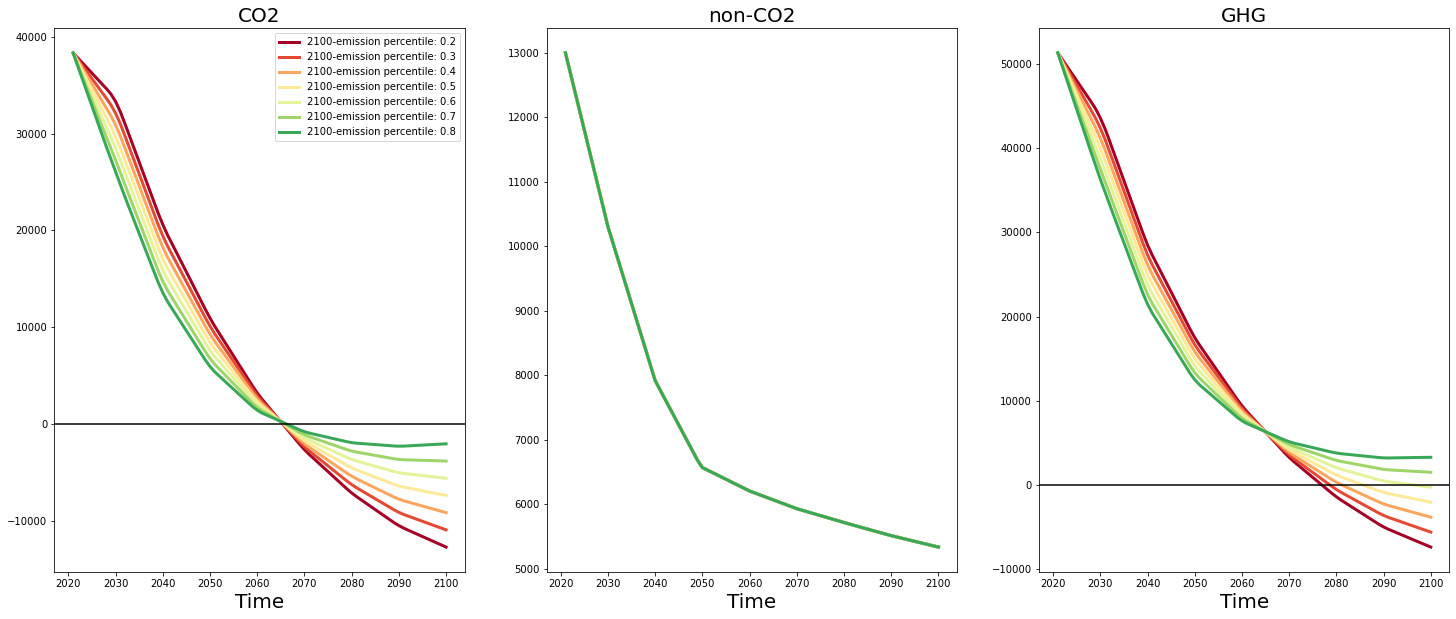

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 10), sharex=True)
for negemis_i, negemis in enumerate(xr_dataread.NegEmis):
    col = plt.cm.RdYlGn(negemis_i/len(xr_dataread.NegEmis))
    ax1.plot(xr_dataread.Time, xr_dataread.CO2_globe.sel(Temperature=1.5, Risk=0.5, NegEmis=negemis, NonCO2=0.5), label='2100-emission percentile: '+str(float(negemis)), lw=3, c=col)
    ax2.plot(xr_dataread.Time, xr_dataread.NonCO2_globe.sel(NonCO2=0.5), label='2100-emission percentile: '+str(float(negemis)), lw=3, c=col)
    ax3.plot(xr_dataread.Time, xr_dataread.GHG_globe.sel(Temperature=1.5, Risk=0.5, NegEmis=negemis, NonCO2=0.5), label='2100-emission percentile: '+str(float(negemis)), lw=3, c=col)

ax1.legend()
for ax_i, ax in enumerate([ax1, ax2, ax3]):
    ax.set_xlabel("Time", fontsize=20)
    ax.set_title(["CO2", "non-CO2", "GHG"][ax_i], fontsize=20)
    ax.set_xlim(ax.get_xlim())
    ax.set_ylim(ax.get_ylim())
    ax.plot([-1e3, 1e5], [0, 0], c='k')